In [1]:
import os
os.chdir('../')

diffusion_pytorch_model.safetensors not found
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
100%|██████████| 748/748 [00:22<00:00, 32.56it/s]


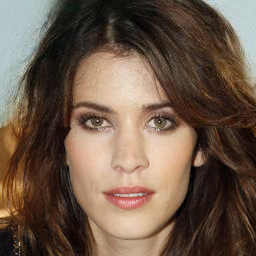

In [17]:
from io import BytesIO

import torch

import PIL
import requests
from diffusers import RePaintPipeline, RePaintScheduler


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


img_url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/repaint/celeba_hq_256.png"
mask_url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/repaint/mask_256.png"

# Load the original image and the mask as PIL images
original_image = download_image(img_url).resize((256, 256))
mask_image = download_image(mask_url).resize((256, 256))

# Load the RePaint scheduler and pipeline based on a pretrained DDPM model
scheduler = RePaintScheduler.from_pretrained("google/ddpm-ema-celebahq-256")
pipe = RePaintPipeline.from_pretrained("google/ddpm-ema-celebahq-256", scheduler=scheduler)
pipe = pipe.to("cuda")

generator = torch.Generator(device="cuda").manual_seed(0)
output = pipe(
    image=original_image,
    mask_image=mask_image,
    num_inference_steps=250,
    eta=0.0,
    jump_length=1,
    jump_n_sample=2,
    generator=generator,
)
inpainted_image = output.images[0]
inpainted_image

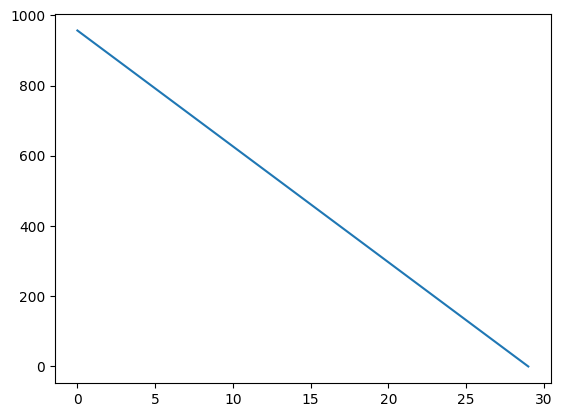

In [12]:
import matplotlib.pyplot as plt

# scheduler.set_timesteps(20, 3, 5)
# scheduler.eta = 0
plt.plot(range(len(scheduler.timesteps.cpu())), scheduler.timesteps.cpu())
plt.show()